<a href="https://colab.research.google.com/github/alexgualberto/Apriori_Supermarket_Product_Recommendation/blob/main/Apriori_Supermarket_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Recomendação de Produtos: Dados de Transações de Supermercado
## Autor: Alexandre dos Santos Gualberto
---
O propósito deste projeto é empregar os algoritmos Apriori e Filtragem Colaborativa para conduzir análises de cestas de compras e oferecer recomendações de produtos.

###Conjunto de Dados
O conjunto de dados utilizado neste projeto é o Supermarket dataset for predictive marketing, disponível no Kaggle. Este conjunto de dados contém informações sobre transações realizadas em um supermercado.








### Atributos do Conjunto de Dados

Este conjunto de dados contém informações detalhadas sobre transações realizadas em um supermercado. Abaixo estão os atributos presentes no conjunto de dados:

1. **order_id**: Um número único que identifica cada pedido realizado no supermercado.
2. **user_id**: Um número único que identifica cada usuário que realizou um pedido.
3. **order_number**: O número do pedido, que indica a ordem em que o pedido foi feito pelo usuário.
4. **order_dow**: O dia da semana em que o pedido foi feito, representado numericamente.
5. **order_hour_of_day**: A hora do dia em que o pedido foi feito, representada em horas.
6. **days_since_prior_order**: O número de dias desde o último pedido feito pelo mesmo usuário.
7. **product_id**: Um identificador único para cada produto disponível no supermercado.
8. **add_to_cart_order**: O número de itens adicionados ao carrinho de compras no momento do pedido.
9. **reordered**: Indica se o produto foi comprado ou não em pedidos anteriores.
10. **department_id**: Um número único atribuído a cada departamento dentro do supermercado.
11. **department**: O nome do departamento ao qual o produto pertence.
12. **product_name**: O nome do produto.

In [151]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv('ECommerce_consumer behaviour.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [153]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,2019501.0,NaN,NaN,NaN,1707012.762445,985983.196234,10.0,852649.0,1705004.0,2559031.0,3421080.0
user_id,2019501.0,NaN,NaN,NaN,103067.265697,59491.165074,2.0,51584.0,102690.0,154600.0,206209.0
order_number,2019501.0,NaN,NaN,NaN,17.151377,17.525765,1.0,5.0,11.0,24.0,100.0
order_dow,2019501.0,NaN,NaN,NaN,2.735367,2.093882,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,2019501.0,NaN,NaN,NaN,13.43948,4.241008,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,1895159.0,NaN,NaN,NaN,11.386035,8.97098,0.0,5.0,8.0,15.0,30.0
product_id,2019501.0,NaN,NaN,NaN,71.205904,38.207275,1.0,31.0,83.0,107.0,134.0
add_to_cart_order,2019501.0,NaN,NaN,NaN,8.363173,7.150059,1.0,3.0,6.0,11.0,137.0
reordered,2019501.0,NaN,NaN,NaN,0.589743,0.49188,0.0,0.0,1.0,1.0,1.0
department_id,2019501.0,NaN,NaN,NaN,9.928349,6.282933,1.0,4.0,9.0,16.0,21.0


In [154]:
data.duplicated().sum()

0

In [155]:
data.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [156]:
data['days_since_prior_order'].value_counts()

7.0     214126
30.0    210814
6.0     155685
5.0     129089
4.0     126250
8.0     118722
3.0     113263
2.0      88737
9.0      75120
14.0     63414
10.0     62073
1.0      59200
13.0     52204
11.0     51476
12.0     48171
15.0     41531
16.0     28632
21.0     28359
0.0      27673
17.0     23921
20.0     23234
18.0     22777
19.0     20140
22.0     19950
28.0     16459
23.0     13779
24.0     12833
27.0     12804
25.0     11832
29.0     11590
26.0     11301
Name: days_since_prior_order, dtype: int64

Perceba que o campo "days_since_prior_order" possui alguns valores nulos, farei a substituição dos valores nulos por 0, assim fica entendido que este item não teve pedido anterior. Desta forma, não será necessário excluir as linhas com esse atributo faltante.

In [157]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)  # Preenche os valores ausentes com zero

imputer.fit(data[['days_since_prior_order']])

# Transformando os dados e preenchendo os valores ausentes com zero
data['days_since_prior_order'] = imputer.transform(data[['days_since_prior_order']])


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


### **Análise dos Dados**

Nesta seção, realizamos uma análise dos dados para compreender diversos aspectos do comportamento de compra dos clientes. Alguns dos principais pontos de análise incluem:

- **Produtos mais populares:** Identificamos os produtos que são mais frequentemente adicionados ao carrinho de compras ou comprados pelos clientes.
  
- **Horário do dia com mais vendas:** Analisamos em que horas do dia as vendas atingem seu pico, o que pode indicar padrões de comportamento de compra dos clientes.

- **Dia da semana com mais vendas:** Investigamos em que dia da semana ocorrem mais transações, o que pode fornecer insights sobre os hábitos de compra semanais dos clientes.

- **Departamento com mais vendas:** Identificamos os departamentos dentro do supermercado que registram o maior volume de vendas, o que pode ser útil para a gestão de estoque e estratégias de marketing.

- **Produtos mais revendidos:** Analisamos quais produtos são mais frequentemente revendidos pelos clientes, o que pode indicar a popularidade e a fidelidade dos clientes a determinados itens.

Essa análise nos ajudará a entender melhor o comportamento dos clientes e a identificar oportunidades para melhorar a eficiência operacional e desenvolver estratégias de marketing mais eficazes.


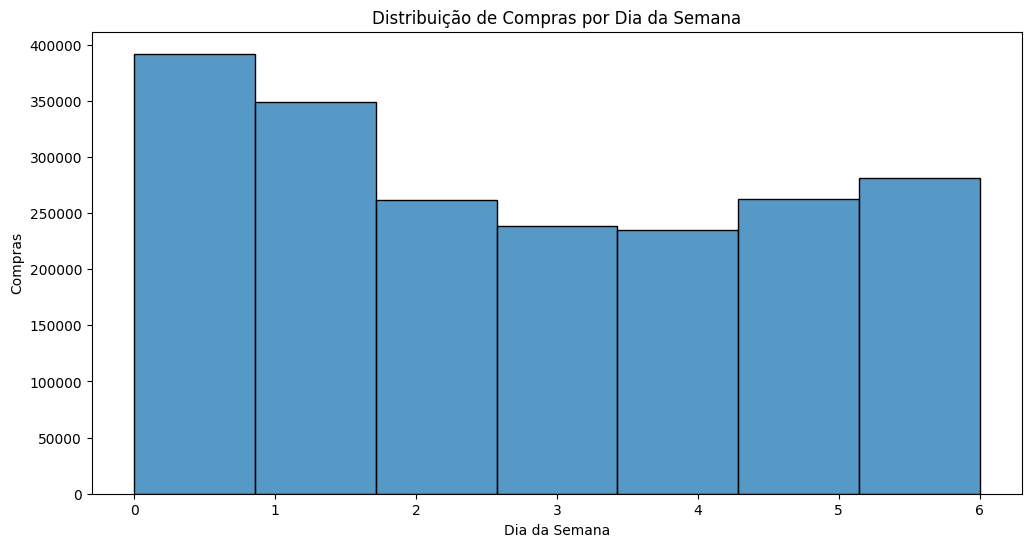

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de Distribuição
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='order_dow', bins=7, kde=False)
plt.xlabel('Dia da Semana')
plt.ylabel('Compras')
plt.title('Distribuição de Compras por Dia da Semana')
plt.show()

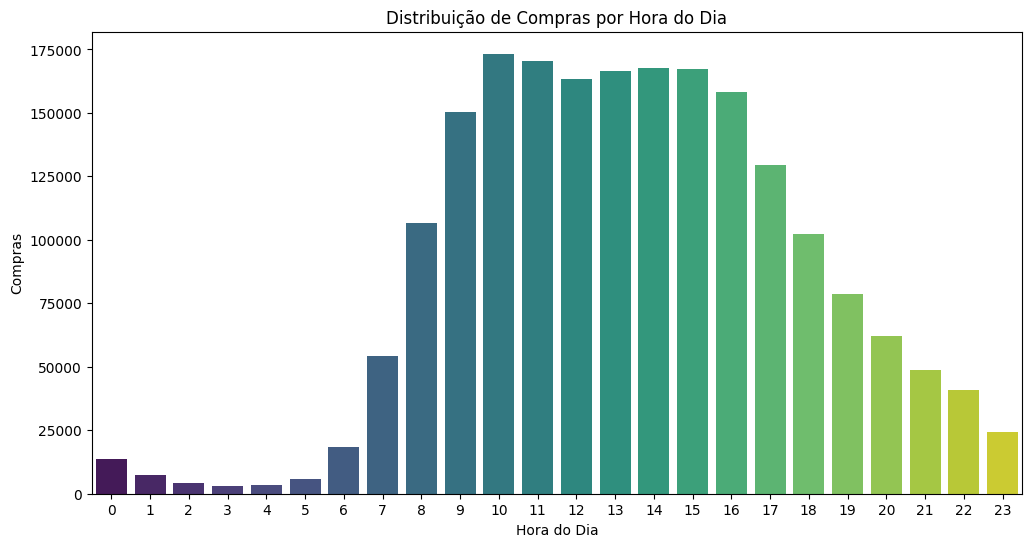

In [160]:
# Análise de Distribuição
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='order_hour_of_day', palette='viridis')
plt.xlabel('Hora do Dia')
plt.ylabel('Compras')
plt.title('Distribuição de Compras por Hora do Dia')
plt.show()

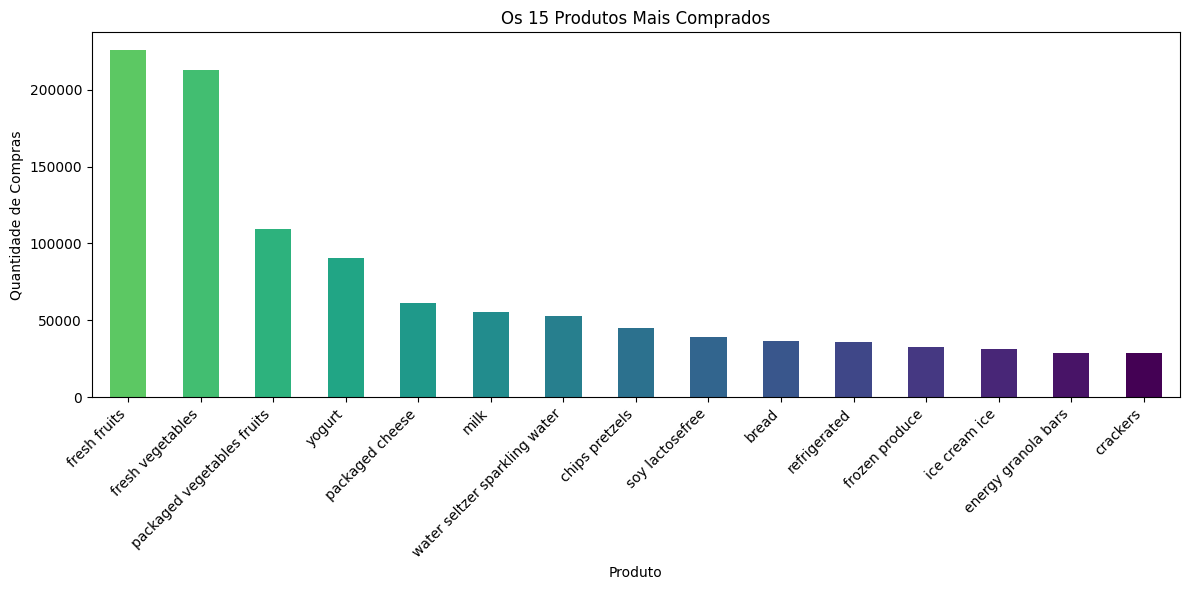

In [161]:
import numpy as np
from matplotlib import cm

# Análise de Produtos
product_counts = data['product_name'].value_counts().head(15)
plt.figure(figsize=(12, 6))
colors = cm.viridis_r(np.linspace(.25, 1, len(product_counts)))
product_counts.plot(kind='bar', color=colors)
plt.xlabel('Produto')
plt.ylabel('Quantidade de Compras')
plt.title('Os 15 Produtos Mais Comprados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

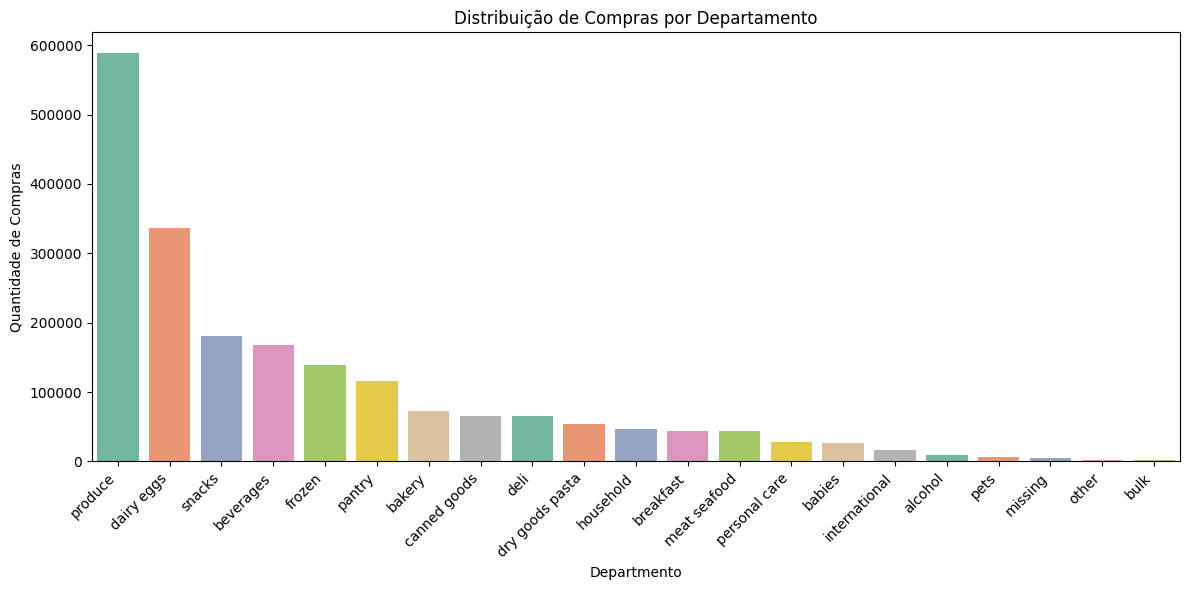

In [162]:
# Análise de Departamento
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='department', palette='Set2', order=data['department'].value_counts().index)
plt.xlabel('Departmento')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Departamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

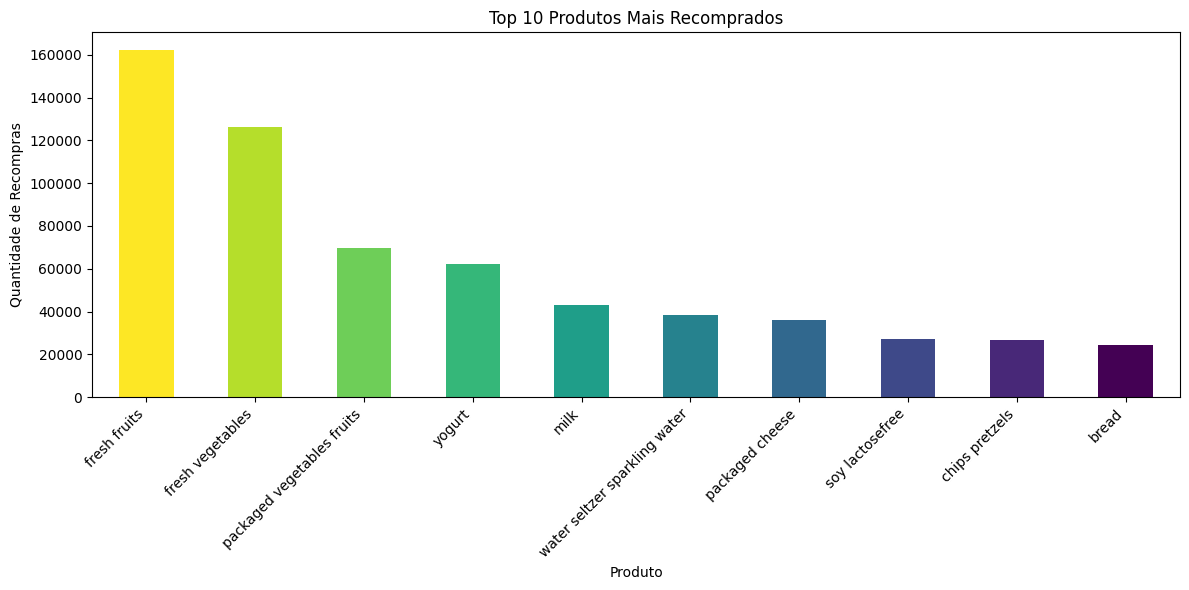

In [163]:
# Conta quantas vezes cada produto foi recomprado
reordered_products = data[data['reordered'] == 1]['product_name'].value_counts()

# Seleciona os 10 produtos mais recomprados
top_reordered_products = reordered_products.head(10)

colors = cm.viridis_r(np.linspace(0, 1, len(top_reordered_products)))

plt.figure(figsize=(12, 6))
top_reordered_products.plot(kind='bar', color=colors)
plt.xlabel('Produto')
plt.ylabel('Quantidade de Recompras')
plt.title('Top 10 Produtos Mais Recomprados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

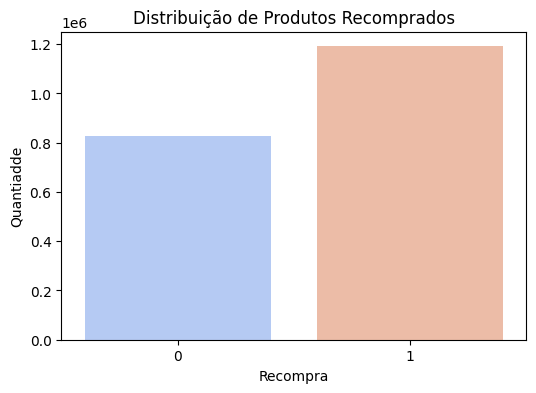

In [164]:
# Análise de Recompra
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='reordered', palette='coolwarm')
plt.xlabel('Recompra')
plt.ylabel('Quantiadde')
plt.title('Distribuição de Produtos Recomprados')
plt.show()

#### Conclusões da Análise de Dados

Após analisar os dados, chegamos às seguintes conclusões:

- **Dias mais movimentados:** Os dois primeiros dias da semana (segunda e terça-feira) são os mais movimentados em termos de transações. Isso sugere que muitos clientes realizam suas compras semanais durante esse período, preparando-se para a semana que está por vir.

- **Faixa de horário mais movimentada:** O período das 9h às 16h é o mais movimentado em termos de vendas. Isso indica que a maioria das transações ocorre durante o horário comercial padrão, quando as pessoas estão fazendo suas compras diárias ou semanais.

- **Produtos mais populares:** As categorias de produtos mais populares incluem frutas e verduras, laticínios e itens de padaria. Isso sugere que os clientes tendem a comprar alimentos frescos e essenciais regularmente, como parte de suas compras habituais.

- **Produtos frequentemente recomprados:** Observou-se que a maioria dos produtos são frequentemente recomprados pelos clientes. Isso sugere que esses itens são essenciais ou de uso regular, refletindo uma demanda consistente por produtos básicos.

- **Departamentos mais movimentados:** Os departamentos mais movimentados incluem ovos e laticínios, além do departamento de produtos frescos ("Produce"). Isso indica que os clientes tendem a comprar uma variedade de produtos frescos com frequência durante suas visitas ao supermercado.

Essas conclusões fornecem insights valiosos sobre o comportamento dos clientes e os padrões de compra, que podem ser usados para orientar estratégias de marketing, gerenciamento de estoque e tomada de decisões operacionais.


### Aplicação do Algoritmo Apriori

- Nesta seção, realizaremos uma análise de cestas e extração de regras de associação usando o algoritmo Apriori. O objetivo é identificar padrões de compra e relações entre produtos que são frequentemente comprados juntos. Essas informações podem ser utilizadas para recomendação de produtos, estratégias de marketing direcionadas e otimização da organização operacional.

O algoritmo Apriori identifica conjuntos de itens frequentes (itemsets) e utiliza esses conjuntos para gerar regras de associação que descrevem as relações entre os itens. Essas regras são então avaliadas com base em métricas como suporte, confiança e lift.

In [165]:
for coluna in data:
    valores = np.unique(data[coluna])
    numero_valores = len(valores)
    print("Numero de valores unicos para o atributo {} : {}".format(coluna, numero_valores))

Numero de valores unicos para o atributo order_id : 200000
Numero de valores unicos para o atributo user_id : 105273
Numero de valores unicos para o atributo order_number : 100
Numero de valores unicos para o atributo order_dow : 7
Numero de valores unicos para o atributo order_hour_of_day : 24
Numero de valores unicos para o atributo days_since_prior_order : 31
Numero de valores unicos para o atributo product_id : 134
Numero de valores unicos para o atributo add_to_cart_order : 137
Numero de valores unicos para o atributo reordered : 2
Numero de valores unicos para o atributo department_id : 21
Numero de valores unicos para o atributo department : 21
Numero de valores unicos para o atributo product_name : 134


Temos, portanto, 200000 transações, 134 produtos e 105273 clientes.

In [166]:
from mlxtend.preprocessing import TransactionEncoder

# cria um tabela verdade para as transações
transacoes = []
for lista_nomes in list(data.groupby(['order_id'])):
  transacoes.append(lista_nomes[1]['product_name'].tolist())

te = TransactionEncoder()
te_vet = te.fit(transacoes).transform(transacoes)

transacoes = pd.DataFrame(te_vet, columns=te.columns_)
transacoes

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [167]:
# Mostra a popularidade dos itens, % de transações em que o item está presente
suporte_itens = []

for coluna in transacoes.columns:
    suporte = transacoes[coluna].sum() / len(transacoes)
    nova_linha = {'item': coluna, 'suporte': suporte}
    suporte_itens.append(nova_linha)

suporte_table = pd.DataFrame(suporte_itens).sort_values("suporte", ascending=False)
suporte_table.head(30)

,item,suporte
50,fresh fruits,0.555995
53,fresh vegetables,0.444360
98,packaged vegetables fruits,0.365415
133,yogurt,0.263675
83,milk,0.243325
93,packaged cheese,0.230995
131,water seltzer sparkling water,0.193005
25,chips pretzels,0.169435
119,soy lactosefree,0.168355
11,bread,0.163865


In [168]:
# Cria-se a tabela de itens frequentes, neste caso todos aqueles que aparecem em pelo menos 5% das transações
from mlxtend.frequent_patterns import apriori, association_rules

itens_frequentes = apriori(transacoes, min_support=0.05, use_colnames=True)
itens_frequentes['length'] = itens_frequentes['itemsets'].apply(lambda x: len(x))
itens_frequentes

,support,itemsets,length
0,0.076635,(baking ingredients),1
1,0.163865,(bread),1
2,0.067765,(breakfast bakery),1
3,0.074330,(butter),1
4,0.069305,(candy chocolate),1
...,...,...,...
151,0.051295,"(milk, yogurt, packaged vegetables fruits)",3
152,0.051915,"(yogurt, packaged cheese, packaged vegetables ...",3
153,0.062535,"(milk, fresh fruits, fresh vegetables, package...",4
154,0.068325,"(fresh fruits, packaged cheese, fresh vegetabl...",4


In [169]:
# regras de associação Se X ---> logo Y
regras = association_rules(itens_frequentes, metric = "confidence", min_threshold=0.75)
regras["antecedent_len"] = regras["antecedents"].apply(lambda x: len(x))
regras[(regras['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(canned jarred vegetables),(fresh vegetables),0.071890,0.444360,0.055055,0.765823,1.723429,0.023110,2.372733,0.452275,1
1,(fresh herbs),(fresh fruits),0.093005,0.555995,0.070135,0.754099,1.356306,0.018425,1.805627,0.289641,1
2,(fresh herbs),(fresh vegetables),0.093005,0.444360,0.078655,0.845707,1.903203,0.037327,3.601205,0.523233,1
3,"(bread, fresh vegetables)",(fresh fruits),0.091590,0.555995,0.072365,0.790097,1.421051,0.021441,2.115288,0.326169,2
4,"(bread, packaged vegetables fruits)",(fresh fruits),0.077055,0.555995,0.062430,0.810201,1.457208,0.019588,2.339337,0.339951,2
5,"(fresh vegetables, chips pretzels)",(fresh fruits),0.082245,0.555995,0.063685,0.774333,1.392697,0.017957,1.967521,0.307238,2
6,"(chips pretzels, packaged vegetables fruits)",(fresh fruits),0.073545,0.555995,0.057595,0.783126,1.408513,0.016704,2.047295,0.313055,2
7,"(eggs, fresh vegetables)",(fresh fruits),0.084310,0.555995,0.066145,0.784545,1.411065,0.019269,2.060780,0.318138,2
8,"(eggs, packaged vegetables fruits)",(fresh fruits),0.068650,0.555995,0.055045,0.801821,1.442137,0.016876,2.240422,0.329183,2
9,"(fresh fruits, fresh herbs)",(fresh vegetables),0.070135,0.444360,0.061815,0.881372,1.983463,0.030650,4.683872,0.533229,2


#### Conclusões da Aplicação do Algoritmo Apriori

Após analisar os resultados da aplicação do algoritmo Apriori ao nosso conjunto de dados, chegamos às seguintes conclusões:

- **Produtos frequentemente comprados em conjunto:** Observa-se que frutas e vegetais, laticínios e produtos de padaria são frequentemente adquiridos em conjunto pelos clientes. Esses grupos de produtos tendem a ser comprados na mesma transação, indicando uma demanda consistente por alimentos frescos e básicos.

- **Critérios de seleção:** Para identificar associações relevantes, foram considerados apenas itens com suporte acima de 5%, confiança superior a 75% e lift maior que 1. Isso permitiu focar em padrões de compra significativos e confiáveis.

Com base nessas conclusões, podemos sugerir que os laticínios e a padaria estejam próximas às frutas e verduras no layout da loja, incentivando assim esse padrão de compra. Além disso, combos e promoções envolvendo esses produtos podem gerar um grande volume de vendas, aproveitando a tendência dos clientes de comprar esses itens em conjunto.

Essas estratégias podem contribuir para aumentar as vendas, melhorar a experiência do cliente e otimizar o desempenho operacional do supermercado.




### Recomendação de Produtos com Filtragem Colaborativa

- Nesta seção, aplicaremos a técnica de Filtragem Colaborativa para gerar recomendações de produtos aos clientes com base em seus hábitos de consumo e na similaridade entre eles.

A Filtragem Colaborativa é uma abordagem em sistemas de recomendação, onde os produtos são recomendados com base nas preferências de usuários semelhantes. A ideia por trás dessa técnica é que usuários com históricos de compras semelhantes tendem a gostar dos mesmos tipos de produtos, e, portanto, é possível fazer recomendações personalizadas com base nessas semelhanças.

1. Os dados do supercado, diferentemente de alguns tipos de feedback explícito, como avaliações de produtos (nota entre 1-5, por exemplo), consistem principalmente em feedback implícito. Isso significa que não temos avaliações diretas dos usuários sobre os produtos, mas sim informações sobre suas interações, como compras realizadas.

2. Para lidar com esse tipo de feedback implícito e criar um sistema de recomendação eficaz, vamos utilizar o pacote Implicit. Essa biblioteca é especialmente projetada para lidar com conjuntos de dados desse tipo e oferece métodos e algoritmos otimizados para a criação de sistemas de recomendação com base em feedback implícito.

3. O primeiro passo será construir uma matriz esparsa que represente a relação entre os usuários e os produtos que eles compraram. Cada entrada nessa matriz indicará quantas vezes um usuário comprou um determinado produto. Em seguida, utilizando algoritmos de fatoração de matriz serão geradas recomendações a partir de similaridades.
4. Com essas informações, poderemos gerar recomendações personalizadas para os usuários, sugerindo produtos com base nas compras anteriores de usuários semelhantes. Essa abordagem nos permitirá oferecer recomendações relevantes e direcionadas, levando em consideração as preferências dos clientes e promovendo uma experiência de compra mais satisfatória.

In [170]:
!pip install implicit

In [171]:
# Cria tabela com o usuário e quantidade comprada de um produto que será a tabela de relação usuário item
df_user_item = pd.crosstab(data['user_id'], data['product_name'])
df_user_item = pd.DataFrame(df_user_item)
df_user_item

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Criação da matriz esparsa**

In [177]:
from scipy.sparse import csr_matrix

user_item_matrix = csr_matrix(df_user_item.values)

**Dicionário para mapear os ids e os produtos para as coordenadas da matriz esparsa**

In [173]:
# Criar um dicionário mapeando os índices do DataFrame para os valores correspondentes
dict_users = {index: user_id for index, user_id in enumerate(df_user_item.index)}
dict_product = {index: product_name for index, product_name in enumerate(df_user_item.columns)}

Neste contexto, aplicamos o bm25_weight para mitigar o efeito de usuários que compraram repetidamente o mesmo produto, bem como para diminuir a influência dos itens mais populares nas recomendações. Essa abordagem busca diversificar as sugestões, incentivando os clientes a explorarem itens que possam não ter considerado anteriormente em suas compras. Além disso, será utilizado o algoritmo de fatorização matricial ALS (Alternating Least Square), que pode ser estudado com mais detalhes no seguinte artigo:

[Y. Hu, Y. Koren and C. Volinsky, "Collaborative Filtering for Implicit Feedback Datasets," 2008 Eighth IEEE International Conference on Data Mining, Pisa, Italy, 2008, pp. 263-272, doi: 10.1109/ICDM.2008.22.](http://yifanhu.net/PUB/cf.pdf)

In [174]:
from implicit.nearest_neighbours import bm25_weight
from implicit.als import AlternatingLeastSquares
from implicit.evaluation import train_test_split
from implicit.evaluation import ranking_metrics_at_k

user_item_matrix = bm25_weight(user_item_matrix, K1=100, B=0.8)

model = AlternatingLeastSquares(factors=128, regularization=0.01, alpha=1)

train_matrix, test_matrix = train_test_split(user_item_matrix, train_percentage = 0.8, random_state = 6)

model.fit(train_matrix)

  0%|          | 0/15 [00:00<?, ?it/s]

In [175]:
ranking_metrics_at_k(model,  train_matrix, test_matrix, K= 32, show_progress=True, num_threads=0)

  0%|          | 0/82595 [00:00<?, ?it/s]

{'precision': 0.4807693176326048,
 'map': 0.07238585557322613,
 'ndcg': 0.18313565760871522,
 'auc': 0.6161688345363378}

In [176]:
userid = dict_users[34]

# Gera 10 recomendações para o usuário
ids, scores = model.recommend(userid, test_matrix[userid], N=10, filter_already_liked_items=True)

# Mapear os IDs dos produtos para os nomes dos produtos
product_names = [dict_product[id_] for id_ in ids]

recommendations_df = pd.DataFrame({"product": product_names, "score": scores, "already_liked": np.in1d(ids, test_matrix[userid].indices)})
recommendations_df

,product,score,already_liked
0,frozen dessert,1.023662,False
1,ice cream ice,1.021593,False
2,marinades meat preparation,1.010853,False
3,pasta sauce,0.987582,False
4,dry pasta,0.985612,False
5,butter,0.984300,False
6,salad dressing toppings,0.982493,False
7,buns rolls,0.982216,False
8,other creams cheeses,0.982031,False
9,frozen appetizers sides,0.978129,False


#### Conclusões Recomendações

- As recomendações foram geradas com sucesso para os usuários do supermercado.
- No entanto, a filtragem colaborativa enfrenta desafios significativos ao gerar recomendações para usuários com poucas compras registradas, pois a falta de histórico de compra dificulta a identificação de padrões de preferência. Para lidar com esse cenário, é necessário explorar outras abordagens de recomendação. Uma solução viável é recomendar os produtos mais populares da loja para esses usuários, o que pode incentivá-los a realizar compras e, consequentemente, gerar mais dados para futuras recomendações personalizadas.

- por já termos extraído as regras de associação dos dados dos clientes, temos uma fonte confiável de recomendações para os casos em que o usuário não tenha realizado muitas compras. Isso significa que, mesmo quando o histórico de compras de um usuário é limitado, podemos recorrer às regras de associação para oferecer sugestões relevantes.